# PVD simulation example

Start with a simple miniature cross

In [1]:
%load_ext autoreload
%autoreload 2
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ["PMIX_MCA_gds"]="hash"

# Import useful packages
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs
from SQDMetal.Comps.Xmon import Xmon
from SQDMetal.Comps.Polygons import PolyRectangle

# Set up chip design as planar
design = designs.DesignPlanar({}, overwrite_enabled=True)

# Set up chip dimensions 
design.chips.main.size.size_x = '5um'
design.chips.main.size.size_y = '5um'
design.chips.main.size.size_z = '100um'
design.chips.main.size.center_x = '0mm'
design.chips.main.size.center_y = '0mm'


Q1 = Xmon(design, 'cross', options = dict(pos_x = '0', pos_y='0',
                                          cross_width='1um', cross_height='1um',
                                          vBar_width='100nm', hBar_width='100nm',
                                          vBar_gap=0, hBar_gap=0))
gndCut = PolyRectangle(design, 'gndCutout', options=dict(pos_x='-2.5um',pos_y='-2.5um',
                                                         end_x='2.5um',end_y='2.5um',
                                                         is_ground_cutout=True))


# gui = MetalGUI(design)
# gui.rebuild()
design.rebuild()

Now consider dual evaporation for the given layer

In [9]:
design.chips['main']['evaporations'] = Dict(
    layer1=Dict(
        bottom_layer='200nm',
        top_layer='100nm',
        undercut='200nm',
        pvd1 = Dict(
        angle_phi = '-90',
        angle_theta = '45',
        metal_thickness = '100nm'
        ),
        pvd2 = Dict(
        angle_phi = '0',
        angle_theta = '45'
        )
    )
)

In [10]:
from SQDMetal.Utilities.PVD_Shadows import PVD_Shadows
%matplotlib inline

  return lib.intersection(a, b, **kwargs)

  return lib.intersection(a, b, **kwargs)



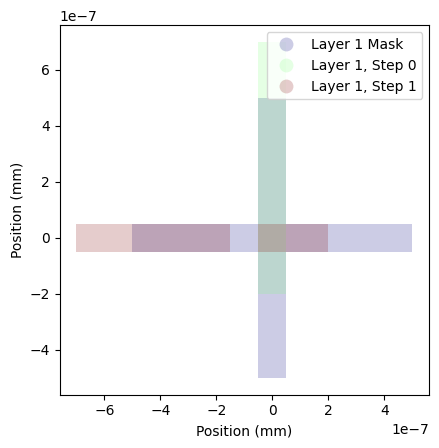

In [11]:
pvdSh = PVD_Shadows(design)
pvdSh.plot_layer(1,'separate', plot_mask=True);